
# Dataset Evaluation - Raw Kaggle Data
---

In [2]:
import pandas as pd
import re
import string
import math

import matplotlib.pyplot as plt
import emoji

In [3]:
from textblob import TextBlob

---
### Importing the Dataset
---

In [4]:
# Importing the tweets data

df = pd.read_csv('stockerbot-export.csv',error_bad_lines=False)
df.head()

b'Skipping line 731: expected 8 fields, saw 13\nSkipping line 2836: expected 8 fields, saw 15\nSkipping line 3058: expected 8 fields, saw 12\nSkipping line 3113: expected 8 fields, saw 12\nSkipping line 3194: expected 8 fields, saw 17\nSkipping line 3205: expected 8 fields, saw 17\nSkipping line 3255: expected 8 fields, saw 17\nSkipping line 3520: expected 8 fields, saw 17\nSkipping line 4078: expected 8 fields, saw 17\nSkipping line 4087: expected 8 fields, saw 17\nSkipping line 4088: expected 8 fields, saw 17\nSkipping line 4499: expected 8 fields, saw 12\n'


,id,text,timestamp,source,symbols,company_names,url,verified
0,1019696670777503700,VIDEO: “I was in my office. I was minding my o...,Wed Jul 18 21:33:26 +0000 2018,GoldmanSachs,GS,The Goldman Sachs,https://twitter.com/i/web/status/1019696670777...,True
1,1019709091038548000,The price of lumber $LB_F is down 22% since hi...,Wed Jul 18 22:22:47 +0000 2018,StockTwits,M,Macy's,https://twitter.com/i/web/status/1019709091038...,True
2,1019711413798035500,Who says the American Dream is dead? https://t...,Wed Jul 18 22:32:01 +0000 2018,TheStreet,AIG,American,https://buff.ly/2L3kmc4,True
3,1019716662587740200,Barry Silbert is extremely optimistic on bitco...,Wed Jul 18 22:52:52 +0000 2018,MarketWatch,BTC,Bitcoin,https://twitter.com/i/web/status/1019716662587...,True
4,1019718460287389700,How satellites avoid attacks and space junk wh...,Wed Jul 18 23:00:01 +0000 2018,Forbes,ORCL,Oracle,http://on.forbes.com/6013DqDDU,True


---
### Text Processing
---

In [5]:
#Processing the the tweets to remove unwanted characters

df2 = df.copy(deep=True)
df2['tokens'] = df2['text'] 
df2.tokens = df2.tokens.str.lower()
df2.tokens = df2.tokens.apply(lambda x: re.sub(r'https?:\/\/\S+', '', x))
df2.tokens = df2.tokens.apply(lambda x: re.sub(r"www\.[a-z]?\.?(com)+|[a-z]+\.(com)", '', x))
df2.tokens = df2.tokens.apply(lambda x: re.sub(r'{link}', '', x))
df2.tokens = df2.tokens.apply(lambda x: re.sub(r"\[video\]", '', x))
df2.tokens = df2.tokens.apply(lambda x: re.sub(r'&[a-z]+;', '', x))
df2.tokens = df2.tokens.apply(lambda x: re.sub(r'[@$#]+', '', x))
df2.tokens = df2.tokens.apply(lambda x: re.sub("([^\x00-\x7F])+"," ",x))  #Removed Chinese symbols


In [6]:
# Moving cleaned tweets to a sepearte dataframe
tweets = df2.drop(columns = ['timestamp', 'url','text'])
tweets

,id,source,symbols,company_names,verified,tokens
0,1019696670777503700,GoldmanSachs,GS,The Goldman Sachs,True,video: i was in my office. i was minding my o...
1,1019709091038548000,StockTwits,M,Macy's,True,the price of lumber lb_f is down 22% since hit...
2,1019711413798035500,TheStreet,AIG,American,True,who says the american dream is dead?
3,1019716662587740200,MarketWatch,BTC,Bitcoin,True,barry silbert is extremely optimistic on bitco...
4,1019718460287389700,Forbes,ORCL,Oracle,True,how satellites avoid attacks and space junk wh...
...,...,...,...,...,...,...
28259,1019730088617635800,test5f1798,FB,Facebook,False,fb : 29234a9c-7f08-4d5a-985f-cb1a5554ecf9
28260,1019730115524288500,keizai_toushi17,BTC,Bitcoin,False,btc
28261,1019730115805184000,iad81,BTC,Bitcoin,False,rt invest_in_hd: 'nuff said! tel telcoin telf...
28262,1019730117252341800,O8viWMyrCV6cBOZ,BTC,Bitcoin,False,btc


---
### Sentiment Analysis
---

In [21]:
# get tweet subjectivity 
def tweet_subjectivity(tweets):
    return TextBlob(tweets).sentiment.subjectivity

# get tweet polarity
def tweet_polarity(tweets):
    return TextBlob(tweets).sentiment.polarity

#Add sentiment
def getSentiment(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'
    
tweets['Subjectivity'] = tweets['tokens'].apply(tweet_subjectivity)

tweets['Polarity'] = tweets['tokens'].apply(tweet_polarity)
  
tweets['Sentiment'] = tweets['Polarity'].apply(getSentiment)

print("\nNumber of tweets in the dataset: ",len(tweets))
tweets.head()


Number of tweets in the dataset:  28264


,id,source,symbols,company_names,verified,tokens,Subjectivity,Polarity,Sentiment
0,1019696670777503700,GoldmanSachs,GS,The Goldman Sachs,True,video: i was in my office. i was minding my o...,1.000000,0.600000,Positive
1,1019709091038548000,StockTwits,M,Macy's,True,the price of lumber lb_f is down 22% since hit...,0.288889,-0.155556,Negative
2,1019711413798035500,TheStreet,AIG,American,True,who says the american dream is dead?,0.200000,-0.100000,Negative
3,1019716662587740200,MarketWatch,BTC,Bitcoin,True,barry silbert is extremely optimistic on bitco...,0.727273,0.005682,Positive
4,1019718460287389700,Forbes,ORCL,Oracle,True,how satellites avoid attacks and space junk wh...,0.000000,0.000000,Neutral


---
### Data Visualization
---

**Sentiment**

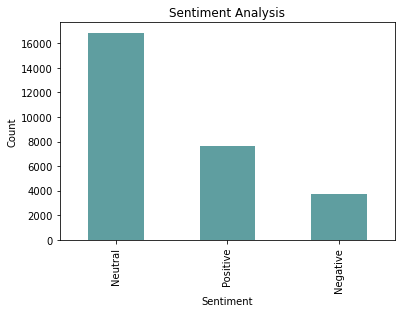

Neutral     16843
Positive     7679
Negative     3742
Name: Sentiment, dtype: int64


In [16]:
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Count')
tweets['Sentiment'].value_counts().plot(kind='bar', color='cadetblue')
plt.show()

print(tweets['Sentiment'].value_counts())

**Tweet Verification**

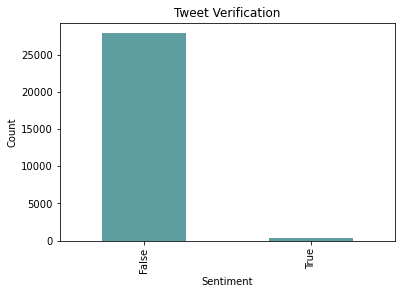

False    27902
True       362
Name: verified, dtype: int64


In [18]:
plt.title('Tweet Verification')
plt.xlabel('Sentiment')
plt.ylabel('Count')
tweets['verified'].value_counts().plot(kind='bar', color='cadetblue')
plt.show()

print(tweets['verified'].value_counts())

**Company Names tagged in the tweets**

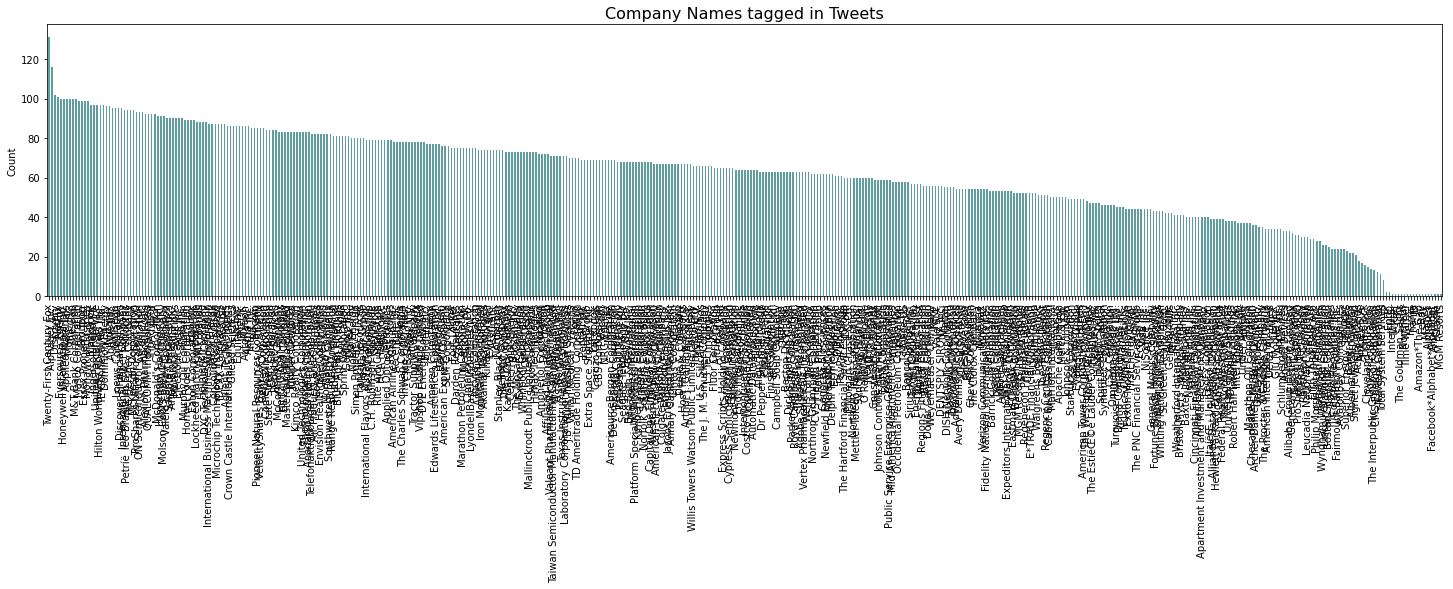

Twenty-First Century Fox      131
Alphabet Inc.                 116
Discovery                     102
Netflix                       101
Eversource Energy             100
                             ... 
Alphabet                        1
Facebook*Alphabet*Alphabet      1
American                        1
Oracle                          1
MGM Resorts                     1
Name: company_names, Length: 461, dtype: int64


In [19]:
plt.title('Company Names tagged in Tweets',fontsize=16)
# plt.xlabel('Comany Names')
plt.ylabel('Count')
tweets['company_names'].value_counts().plot(kind='bar', figsize=(25,5), color='cadetblue')
plt.show()
print(tweets['company_names'].value_counts())

<br>

**Sources of the tweets within the dataset**

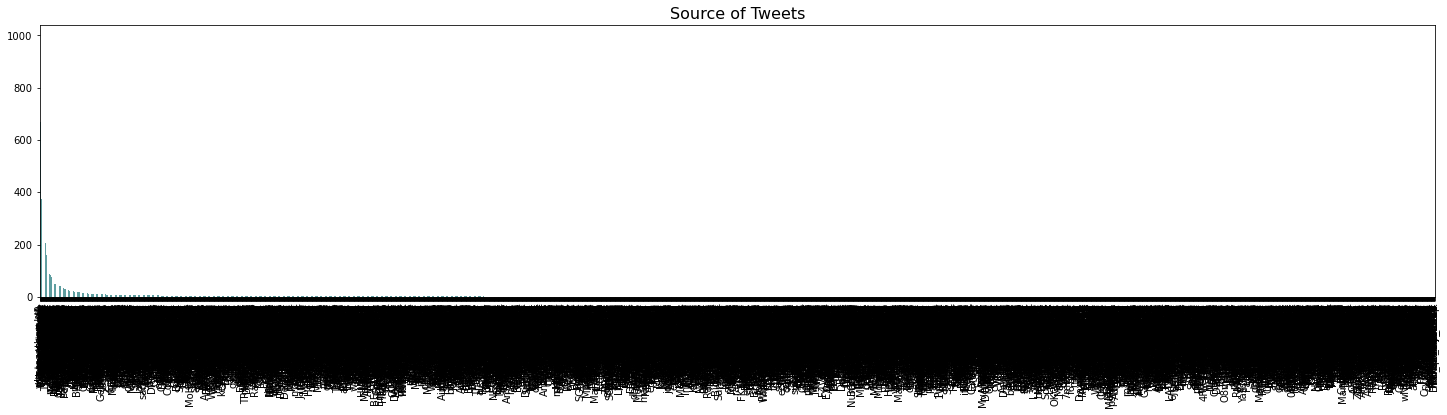

In [20]:
plt.title('Source of Tweets',fontsize=16)
tweets['source'].value_counts().plot(kind='bar', figsize=(25,5), color='cadetblue')
plt.show()

In [102]:
tweets['source'].value_counts()

bibeypost_stock    990
whatsonthorold2    963
mmahotstuff1       899
reurope_stock      668
MareaInformativ    640
                  ... 
Tablaosvaldo2        1
RRJJ1982             1
_shanbon_            1
mserous              1
DaveRozay1           1
Name: source, Length: 5879, dtype: int64

---
**Conclusion**

---
The dataset will be filtered to verified tweets only due when testing and evaluating the models. This is due to the following reasons:
1. Unverified tweets contain multiple emoji which are proving difficult to remove during the text processing step
2. A smaller dataset size would be more manageable during the configuration stage
3. Increased processing time 
4. Unverified tweets are often bots which post duplicates of the same tweet.